# Deep Learning

## HW1- problem 2- Support Vector Machine (100 + 10 pts)

### Please fill this part


1.   Full Name: مرتضی غفورزاده
2.   Student Number: ۴۰۱۳۰۰۷۸۵


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.


In [2]:
df = pd.read_csv("./data/Heart_Disease_Dataset.csv") 

### Pre-Processing - (40 pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  1190 Rows and 12 Columns
this dataset has 0 missing value(s)
ballanced: True
--------------------- Plots --------------------------


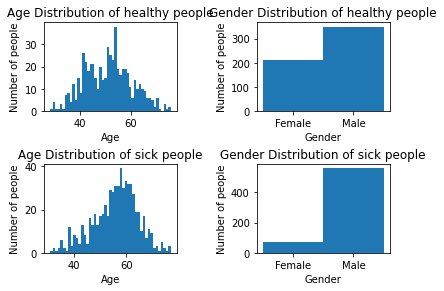

In [3]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################

rowCount=df.shape[0]
colCount=df.shape[1]
shape = '{} Rows and {} Columns'.format(rowCount,colCount)
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################

missings = df.count().sum()-(rowCount*colCount)
print("this dataset has {} missing value(s)".format(missings))

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################
healthyClass=df[df['target']==0]
sickClass=df[df['target']==1]
healthyClassCount=healthyClass['target'].count()
sickClassCount=sickClass['target'].count()
classDiff=abs(healthyClassCount-sickClassCount)
if classDiff<100:
    print("ballanced: True")
else:
    print("ballanced: False")
    

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Plots --------------------------")
plt.subplot(2,2,1)
plt.hist(healthyClass['age'],bins=healthyClass['age'].max()-healthyClass['age'].min()+1)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age Distribution of healthy people')
plt.subplot(2,2,2)
plt.hist(healthyClass['sex'],bins=[-0.5,0.5,1.5])
plt.xlabel('Gender')
plt.xticks([0,1],['Female','Male'])
plt.ylabel('Number of people')
plt.title('Gender Distribution of healthy people')
plt.subplot(2,2,3)
plt.hist(sickClass['age'],bins=sickClass['age'].max()-sickClass['age'].min()+1)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age Distribution of sick people')
plt.subplot(2,2,4)
plt.hist(sickClass['sex'],bins=[-0.5,0.5,1.5])
plt.xlabel('Gender')
plt.xticks([0,1],['Female','Male'])
plt.ylabel('Number of people')
plt.title('Gender Distribution of sick people')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)
plt.show()

#### Question 1: What do you conclude from the plots?
#### Answer:

Although the dataset is not balanced with respect to gender (281 Females and 889 males), one can observe that women had greater negative rate and 75% of females were healthy. In contrast, about 63% of men suffer from heart risk. Moreover, considering age, it can be concluded that older people are more prone to heart risk.

In [4]:
# As complement of answer of question 1
print(df.pivot_table(index=['target'],columns=['age'], aggfunc='size'))
print(df.pivot_table(index=['target'],columns=['sex'], aggfunc='size'))

age      28   29   30   31   32   33   34   35   36    37  ...   68    69  \
target                                                     ...              
0       1.0  4.0  1.0  1.0  3.0  1.0  7.0  8.0  4.0  12.0  ...  6.0   5.0   
1       NaN  NaN  NaN  1.0  2.0  1.0  2.0  6.0  2.0   1.0  ...  7.0  11.0   

age      70   71   72   73   74   75   76   77  
target                                          
0       2.0  6.0  1.0  NaN  3.0  1.0  2.0  NaN  
1       9.0  2.0  3.0  1.0  5.0  2.0  1.0  3.0  

[2 rows x 50 columns]
sex       0    1
target          
0       211  350
1        70  559


#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

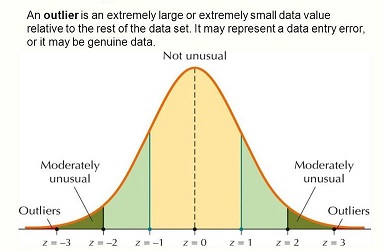

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [5]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
'''
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
'''

print("--------------------- age outliers --------------------------")
age_outliers=df[ ( ( abs(df['age']-df['age'].mean()) / df['age'].std() ) > 3 )]
print('Based on "age" detected {} outlier(s)!'.format(age_outliers.index.nunique()))
print( age_outliers.index )

print("--------------------- resting bp s outliers --------------------------")
resing_bp_s_outliers=df[ ( ( abs(df['resting bp s']-df['resting bp s'].mean()) / df['resting bp s'].std() ) > 3 ) ]
print('Based on "resting bp s" detected {} outlier(s)!'.format(resing_bp_s_outliers.index.nunique()))
print( resing_bp_s_outliers.index )

print("--------------------- cholesterol outliers --------------------------")
cholesterol_outliers=df[ ( ( abs(df['cholesterol']-df['cholesterol'].mean()) / df['cholesterol'].std() ) > 3 )]
print('Based on "cholesterol" detected {} outlier(s)!'.format(cholesterol_outliers.index.nunique()))
print( cholesterol_outliers.index )

print("--------------------- max heart rate outliers --------------------------")
max_heart_rate_outliers=df[ ( ( abs(df['max heart rate']-df['max heart rate'].mean()) / df['max heart rate'].std() ) > 3 ) ]
print('Based on "resting bp s" detected {} outlier(s)!'.format(max_heart_rate_outliers.index.nunique()))
print( max_heart_rate_outliers.index )

print("--------------------- target data frame --------------------------")

df = df[     ( ( abs(df['age']-df['age'].mean() ) / df['age'].std() ) < 3 ) \
              & ( (abs( df['resting bp s']-df['resting bp s'].mean() ) / df['resting bp s'].std() ) < 3 ) \
              & ( ( abs(df['cholesterol']-df['cholesterol'].mean() ) / df['cholesterol'].std() ) < 3 ) \
              & ( (abs(df['max heart rate']-df['max heart rate'].mean()) / df['max heart rate'].std() ) < 3 )]
df

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

--------------------- age outliers --------------------------
Based on "age" detected 0 outlier(s)!
Int64Index([], dtype='int64')
--------------------- resting bp s outliers --------------------------
Based on "resting bp s" detected 10 outlier(s)!
Int64Index([109, 242, 366, 400, 450, 593, 734, 761, 1013, 1075], dtype='int64')
--------------------- cholesterol outliers --------------------------
Based on "cholesterol" detected 5 outlier(s)!
Int64Index([30, 76, 149, 618, 1039], dtype='int64')
--------------------- max heart rate outliers --------------------------
Based on "resting bp s" detected 2 outlier(s)!
Int64Index([371, 391], dtype='int64')
--------------------- target data frame --------------------------


age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1173 rows x 12 columns]

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [6]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################

# normalizing "age" Column 
df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())    

# normalizing "resting bp s" Column 
df['resting bp s'] = (df['resting bp s'] - df['resting bp s'].min()) / (df['resting bp s'].max() - df['resting bp s'].min())  

# normalizing "cholesterol" Column 
df['cholesterol'] = (df['cholesterol'] - df['cholesterol'].min()) / (df['cholesterol'].max() - df['cholesterol'].min()) 

# normalizing "max heart rate" Column 
df['max heart rate'] = (df['max heart rate'] - df['max heart rate'].min()) / (df['max heart rate'].max() - df['max heart rate'].min())

# normalizing "oldpeak" Column 
df['oldpeak'] = (df['oldpeak'] - df['oldpeak'].min())  / (df['oldpeak'].max() - df['oldpeak'].min())

df


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

age  sex  chest pain type  resting bp s  cholesterol  \
0     0.244898    1                2      0.571429     0.588595   
1     0.428571    0                3      0.761905     0.366599   
2     0.183673    1                2      0.476190     0.576375   
3     0.408163    0                4      0.552381     0.435845   
4     0.530612    1                3      0.666667     0.397149   
...        ...  ...              ...           ...          ...   
1185  0.346939    1                1      0.285714     0.537678   
1186  0.816327    1                4      0.609524     0.393075   
1187  0.591837    1                4      0.476190     0.266802   
1188  0.591837    0                2      0.476190     0.480652   
1189  0.204082    1                3      0.552381     0.356415   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0        0.777778                0   
1                       0            0        0.659259                0   
2                       0            1        0.229630                0   
3                       0            0        0.303704                1   
4                       0            0        0.407407                0   
...                   ...          ...             ...              ...   
1185                    0            0        0.481481                0   
1186                    1            0        0.548148                0   
1187                    0            0        0.355556                1   
1188                    0            2        0.792593                0   
1189                    0            0        0.785185                0   

       oldpeak  ST slope  target  
0     0.295455         1       0  
1     0.409091         2       1  
2     0.295455         1       0  
3     0.465909         2       1  
4     0.295455         1       0  
...        ...       ...     ...  
1185  0.431818         2       1  
1186  0.681818         2       1  
1187  0.431818         2       1  
1188  0.295455         2       1  
1189  0.295455         1       0  

[1173 rows x 12 columns]

### SVM - (60 pts)

#### spliting data

In [7]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [8]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    Positive=y_true[y_true>0].sum()
    Negative=-y_true[y_true<0].sum()
    y_agg=y_true+y_pred
    TP=(y_agg[y_agg>0].sum()/2)
    TN=-(y_agg[y_agg<0].sum()/2)
    FN=Positive-TP
    FP=Negative-TN
    
    Accuracy = ((TN+TP)/(TN+TP+FN+FP)) 
    Precision = (TP/(TP+FP))
    Recall = (TP/(TP+FN))
    F1score =  2 * (Precision * Recall) / (Precision + Recall)
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [9]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# linear kernel
clf_linear_svc = SVC(kernel='linear',C=1.02)
clf_linear_svc.fit(X_train,y_train)
y_linSVM=clf_linear_svc.predict(X_test)

print("results of sklearn svm linear kernel:", classification_report(y_test, y_linSVM))




# polynomial kernel
clf_polynomial_svc = SVC(kernel='poly',C=1.02,degree=20)
clf_polynomial_svc.fit(X_train,y_train)
y_polSVM=clf_polynomial_svc.predict(X_test)

print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_polSVM))



# rbf kernel
clf_rbf_svc = SVC(kernel='rbf',C=20,gamma=20)
clf_rbf_svc.fit(X_train,y_train)
y_rbfSVM=clf_rbf_svc.predict(X_test)

print("results of sklearn svm RBF kernel:", classification_report(y_test, y_rbfSVM))


#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel: (0.7869318181818182, 0.7756410256410257, 0.7515527950310559, 0.7634069400630915)
results of sklearn svm polynomial kernel: (0.8579545454545454, 0.8881118881118881, 0.7888198757763976, 0.8355263157894737)
results of sklearn svm RBF kernel: (0.9318181818181818, 0.9101796407185628, 0.9440993788819876, 0.9268292682926829)


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [196]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################

# References used: 
#      parts "1.4.6 Kernel functions" and "1.4.7.1 SVC" from https://scikit-learn.org/stable/modules/svm.html 
#      "Quadratic Programming with Python and CVXOPT form "https://course.csail.mit.edu/6.687/wiki/images/a/a7/Qp-cvxopt.pdf

def linear_kernel(x,y):
    return np.dot(x,y)

def polynomial_kernel(x,y,D=5,C=None):
    if C is None:
        return (1+np.dot(x,y))**D
    else:
        return (C+np.dot(x,y))**D

def rbf_kernel(x,y,gamma=8): # gamma>0
    return np.exp( -gamma*np.dot(x-y,x-y) )

#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None ,par=-1.0):
        self.kernel = kernel
        self.C = C
        self.par=par
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                if self.par==-1.0:
                    K[i][j] = self.kernel(X[i], X[j])
                else:
                    K[i][j] = self.kernel(X[i], X[j],self.par)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################        
        P = cvxopt.matrix((np.reshape(y,(len(y),1))*y) * K) # (y.y^T)*K
        #q = cvxopt.matrix(np.full((1,n_samples), -1))
        q = cvxopt.matrix(np.ones(n_samples) * -1)      # all -1 elements
        A = cvxopt.matrix(y, (1,n_samples))             # train labels
        b = cvxopt.matrix(0.0)                          
        if self.C is not None:
            G = cvxopt.matrix(np.vstack((np.identity(n_samples) * -1, np.identity(n_samples))))
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))
        else:
            G = cvxopt.matrix(np.identity(n_samples) * -1)
            h = cvxopt.matrix(np.zeros(n_samples))
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        vb = np.zeros(len(self.alpha))
        for n in range(len(self.alpha)):
            vb[n] = self.sv_y[n] - np.sum(self.alpha * self.sv_y * K[sv,ind[n]])
        self.b = vb.mean()

        # Weight vector
        if self.kernel == linear_kernel:  
            self.w = np.zeros(n_features)
            for n in range(len(self.alpha)):
                self.w += self.alpha[n] * self.sv_y[n] * self.sv[n] #linear kernel is dot product and can be rearranged this way
        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
            
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                decision_vec=np.zeros(len(self.alpha))
                for n in range(len(self.alpha)):
                    decision_vec[n] = self.alpha[n] * self.sv_y[n] * self.kernel(self.sv[n],X[i])
                y_predict[i] = decision_vec.sum()

            return np.sign(y_predict + self.b)
        

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [197]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel

clf_linear_QP = MySVM(kernel=linear_kernel,C=3)
clf_linear_QP.fit(X_train,y_train)
y_linQP=np.sign(clf_linear_QP.predict(X_test))

print("results of MySVM linear kernel:", classification_report(y_test , y_linQP))


# polynomial kernel

clf_polynomial_QP = MySVM(kernel=polynomial_kernel,C=2,par=5)
clf_polynomial_QP.fit(X_train,y_train)
y_polQP=clf_polynomial_QP.predict(X_test)

print("results of MySVM polynomial kernel:", classification_report(y_test , y_polQP))


# rbf kernel

clf_rbf_QP = MySVM(kernel=rbf_kernel,C=3,par=5)
clf_rbf_QP.fit(X_train,y_train)
y_rbfQP=clf_rbf_QP.predict(X_test)

print("results of Mysvm RBF kernel:", classification_report(y_test , y_rbfQP))

results of MySVM linear kernel: (0.7926136363636364, 0.7972972972972973, 0.7329192546583851, 0.7637540453074434)
results of MySVM polynomial kernel: (0.8721590909090909, 0.8866666666666667, 0.8260869565217391, 0.855305466237942)
results of Mysvm RBF kernel: (0.9147727272727273, 0.901840490797546, 0.9130434782608695, 0.9074074074074073)


#### Question 2: Report best results.



1.  Best kernel: 
2.  Best Accuracy: 




Considering submitted implementation of Quadratic Programming of SVM,
The Best Kernel was the RBF Kernel and
Best Accuracy was 0.91477

### Bonus Score - (10pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

In what follows, SVM with the sigmoid kernel is implemented by Quadratic Programming solver. This kernel results to Recall Measure equal to one, i.e. zero False Negative, which is desirable for healthcare applications.

In [198]:
def sigmoid_kernel(x,y,K=1,C=-0.1): # for some (not every) K>0 and C<0.
    return np.tanh(K*np.dot(x,y)+C)

# sigmoid kernel

clf_sigmoid_QP = MySVM(kernel=sigmoid_kernel,C=1,par=14)
clf_sigmoid_QP.fit(X_train,y_train)
y_sigmoidQP=clf_sigmoid_QP.predict(X_test)

print("results of Mysvm sigmoid kernel:", classification_report(y_test , y_sigmoidQP)) # Recall Measure = 1 i.e. FN=0

results of Mysvm sigmoid kernel: (0.45738636363636365, 0.45738636363636365, 1.0, 0.6276803118908382)
